In [1]:
import tensorflow as tf
import numpy as np
import random
from constants import TASK_LIST
from constants import INITIAL_ALPHA
from constants import INITIAL_GAMMA
from constants import EPSILON
from constants import NUM_TRA_EPISODES
from constants import NUM_EVAL_EPISODES
from scene_loader import THORDiscreteEnvironment as Environment
from RLalgs.utils import epsilon_greedy
from RLalgs.utils import action_selection


def QLearning(env, num_episodes, gamma, lr, e, plot_list):
    """
    Implement the Q-learning algorithm following the epsilon-greedy exploration.

    Inputs:
    env: THORDiscreteEnvironment
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.

    Outputs:
    Q: numpy.ndarray
    """

    Q = np.zeros((env.n_locations, env.nA))
    

    for i in range(num_episodes):
        env.reset()
        current_state = env.current_state_id
        episode_reward = 0
        start = current_state
        if start not in plot_list:
            plot_list[start]=[]
        delta = []
        while env.terminal==False:
            action = epsilon_greedy(Q[current_state], e)
            S = env.step(action)
            if env.terminal == True:
                R = 1
            elif env.collided == True:
                R = -0.1
            else: R = -0.05
            episode_reward += R
            delta.append(R + gamma * np.max(Q[S]) - Q[current_state, action])
            Q[current_state, action] = Q[current_state, action] + lr * (R + gamma * np.max(Q[S]) - Q[current_state, action])
            current_state = env.current_state_id
        
        print ("episodes: ", i)
        print ("delta: ", np.mean(delta))
        plot_list[start].append(episode_reward)

    

    return Q






RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


In [2]:
# #Q Learning for realizing the navigation
# if __name__ == '__main__':

list_of_tasks = TASK_LIST
scene_scopes = list_of_tasks.keys()

initial_learning_rate = INITIAL_ALPHA
gamma = INITIAL_GAMMA

branches = []
for scene in scene_scopes:
    for task in list_of_tasks[scene]:
        branches.append((scene, task))

scene, task = branches[0]


env = Environment({
    'scene_name': scene,
    'terminal_state_id': int(task)
})
env.reset()
plot_list = {}
Q = QLearning(env, NUM_TRA_EPISODES, gamma, initial_learning_rate, EPSILON, plot_list)
print (Q)



episodes:  0
delta:  -0.049204545454545445
episodes:  1
delta:  0.01643395444568995
episodes:  2
delta:  0.03788237376075946
episodes:  3
delta:  0.03404993417720377
episodes:  4
delta:  0.052393360824776324
episodes:  5
delta:  0.07787955962338702
episodes:  6
delta:  0.15340645295773864
episodes:  7
delta:  0.16209738718392974
episodes:  8
delta:  0.26696386867786304
episodes:  9
delta:  0.3976857602518924
episodes:  10
delta:  0.25257867616407226
episodes:  11
delta:  0.3955784525941096
episodes:  12
delta:  0.4488321331738864
episodes:  13
delta:  0.35849687769650623
episodes:  14
delta:  0.2865209181210789
episodes:  15
delta:  0.495449779323859
episodes:  16
delta:  0.47765851303113654
episodes:  17
delta:  0.2932890940798909
episodes:  18
delta:  0.5982494443800885
episodes:  19
delta:  0.3106198720744489
episodes:  20
delta:  0.370914150534999
episodes:  21
delta:  0.21624656574876158
episodes:  22
delta:  0.2329279828854353
episodes:  23
delta:  0.3233882849268591
episodes:  2

episodes:  201
delta:  1.106818671786576
episodes:  202
delta:  4.851969706436775
episodes:  203
delta:  0.7254576195713666
episodes:  204
delta:  1.6110587662328995
episodes:  205
delta:  0.6163909699428649
episodes:  206
delta:  1.185860015892258
episodes:  207
delta:  1.3694080569056077
episodes:  208
delta:  0.769952914174893
episodes:  209
delta:  18.816583637715294
episodes:  210
delta:  1.2777143443331596
episodes:  211
delta:  0.9915420281372997
episodes:  212
delta:  0.6596822156528491
episodes:  213
delta:  0.5078849349184804
episodes:  214
delta:  3.439772202043306
episodes:  215
delta:  0.3136145613569495
episodes:  216
delta:  0.7748974369076969
episodes:  217
delta:  4.903606083684328
episodes:  218
delta:  0.7964976691572307
episodes:  219
delta:  1.170803628144206
episodes:  220
delta:  0.8315230788156371
episodes:  221
delta:  10.760100000000023
episodes:  222
delta:  1.988968953900749
episodes:  223
delta:  1.0902624956595974
episodes:  224
delta:  0.8223810845060967


episodes:  398
delta:  0.958553892158863
episodes:  399
delta:  0.4053284875532333
episodes:  400
delta:  2.4872282118427034
episodes:  401
delta:  1.7920071084308453
episodes:  402
delta:  1.1821082799379452
episodes:  403
delta:  0.9340600410350701
episodes:  404
delta:  3.112266584402015
episodes:  405
delta:  0.29794550032702
episodes:  406
delta:  0.9178894211945825
episodes:  407
delta:  0.8145562245360435
episodes:  408
delta:  0.9301857099820593
episodes:  409
delta:  0.711473146833565
episodes:  410
delta:  0.646832601198037
episodes:  411
delta:  1.4452800298884345
episodes:  412
delta:  1.7580512968337025
episodes:  413
delta:  0.47331406994672093
episodes:  414
delta:  0.37653081541047645
episodes:  415
delta:  1.3459190561493097
episodes:  416
delta:  0.7610630895064906
episodes:  417
delta:  2.521555503158633
episodes:  418
delta:  0.6993015861644263
episodes:  419
delta:  0.49636558922792307
episodes:  420
delta:  2.4472994948186937
episodes:  421
delta:  0.4078240712294

episodes:  595
delta:  0.7978904659289255
episodes:  596
delta:  1.278913451638478
episodes:  597
delta:  1.2499821818368662
episodes:  598
delta:  0.7945428002227226
episodes:  599
delta:  0.7270616742814691
episodes:  600
delta:  1.9604476191247784
episodes:  601
delta:  2.359674154049336
episodes:  602
delta:  1.689979191922687
episodes:  603
delta:  1.1732617168684039
episodes:  604
delta:  0.9984889593371173
episodes:  605
delta:  1.8316163832383778
episodes:  606
delta:  0.6088845582135959
episodes:  607
delta:  0.9138626248856311
episodes:  608
delta:  2.3465487979213018
episodes:  609
delta:  4.798388569079643
episodes:  610
delta:  0.9858954572067233
episodes:  611
delta:  1.3505502150762383
episodes:  612
delta:  0.5979250565942751
episodes:  613
delta:  1.2752948255725682
episodes:  614
delta:  2.742542907932836
episodes:  615
delta:  5.600624351713844
episodes:  616
delta:  2.217350877232795
episodes:  617
delta:  3.644099059501574
episodes:  618
delta:  1.3147727163724996


episodes:  793
delta:  0.6271283116991483
episodes:  794
delta:  1.068911215191683
episodes:  795
delta:  1.3244978365233928
episodes:  796
delta:  5.413674074741494
episodes:  797
delta:  1.495602564350237
episodes:  798
delta:  1.4125180468136402
episodes:  799
delta:  4.099780312272049
episodes:  800
delta:  0.9803543916905535
episodes:  801
delta:  1.4947046228297935
episodes:  802
delta:  1.1340131983923527
episodes:  803
delta:  0.7969948240537137
episodes:  804
delta:  0.7686983789627754
episodes:  805
delta:  1.3311662432310494
episodes:  806
delta:  0.2648015780849557
episodes:  807
delta:  0.9779803055785328
episodes:  808
delta:  1.2836360273092426
episodes:  809
delta:  10.299463947679993
episodes:  810
delta:  0.7366009608909393
episodes:  811
delta:  1.2982558440741436
episodes:  812
delta:  0.8937720751433854
episodes:  813
delta:  1.096982778025652
episodes:  814
delta:  1.1339624468499392
episodes:  815
delta:  0.8274419263433037
episodes:  816
delta:  0.30810987504947

episodes:  990
delta:  0.7165332565394623
episodes:  991
delta:  2.090987685530449
episodes:  992
delta:  0.3503337091885331
episodes:  993
delta:  3.978512430929496
episodes:  994
delta:  3.058855167560661
episodes:  995
delta:  3.8234498880748093
episodes:  996
delta:  0.5093148137882008
episodes:  997
delta:  1.292480443994176
episodes:  998
delta:  1.3071681130590418
episodes:  999
delta:  0.29367494863117666
episodes:  1000
delta:  0.6066986307070033
episodes:  1001
delta:  43.23699366507105
episodes:  1002
delta:  0.39036634702721834
episodes:  1003
delta:  2.7511363507971085
episodes:  1004
delta:  2.0955405988229585
episodes:  1005
delta:  6.752182005741489
episodes:  1006
delta:  1.0219045350526013
episodes:  1007
delta:  6.8264772496999
episodes:  1008
delta:  4.417008679995342
episodes:  1009
delta:  4.984125038561309
episodes:  1010
delta:  1.4574143809049627
episodes:  1011
delta:  1.3704240982025495
episodes:  1012
delta:  2.069836295836176
episodes:  1013
delta:  2.40456

episodes:  1185
delta:  1.5245559723080926
episodes:  1186
delta:  0.8661301893528218
episodes:  1187
delta:  6.182387085254269
episodes:  1188
delta:  2.273762974442212
episodes:  1189
delta:  0.5826010348521138
episodes:  1190
delta:  0.4025570880858341
episodes:  1191
delta:  0.796301114904994
episodes:  1192
delta:  3.1238840446211946
episodes:  1193
delta:  1.9785881054254704
episodes:  1194
delta:  1.227343138638888
episodes:  1195
delta:  1.377471651235199
episodes:  1196
delta:  1.0840229455657604
episodes:  1197
delta:  0.3657330892807121
episodes:  1198
delta:  0.5979842382563514
episodes:  1199
delta:  1.4114737146368164
episodes:  1200
delta:  0.9194868186728097
episodes:  1201
delta:  0.9462636878163486
episodes:  1202
delta:  1.6130343142980872
episodes:  1203
delta:  0.7613610881915637
episodes:  1204
delta:  8.785325231615209
episodes:  1205
delta:  2.114641521434348
episodes:  1206
delta:  2.26377450701965
episodes:  1207
delta:  4.48887623781638
episodes:  1208
delta:

episodes:  1379
delta:  0.7146128539579752
episodes:  1380
delta:  1.0846457372537026
episodes:  1381
delta:  0.8026798911836246
episodes:  1382
delta:  1.0811475940526896
episodes:  1383
delta:  1.5642956093519762
episodes:  1384
delta:  1.1871980128942101
episodes:  1385
delta:  3.503768722844125
episodes:  1386
delta:  6.501356287554064
episodes:  1387
delta:  1.4516359127096525
episodes:  1388
delta:  2.498149948755145
episodes:  1389
delta:  3.225760491518386
episodes:  1390
delta:  3.0442629504335885
episodes:  1391
delta:  1.472267702005851
episodes:  1392
delta:  3.4801617798115614
episodes:  1393
delta:  1.8310663231491173
episodes:  1394
delta:  1.0793856762803593
episodes:  1395
delta:  0.4277300268403388
episodes:  1396
delta:  3.8289570357853147
episodes:  1397
delta:  0.9823020774255106
episodes:  1398
delta:  1.903556279363084
episodes:  1399
delta:  2.724135462996563
episodes:  1400
delta:  0.9617149376152874
episodes:  1401
delta:  1.2763181039642697
episodes:  1402
de

episodes:  1575
delta:  0.6130749203996844
episodes:  1576
delta:  0.525397068012375
episodes:  1577
delta:  1.6895026334744543
episodes:  1578
delta:  1.8772872378414112
episodes:  1579
delta:  0.682481602572975
episodes:  1580
delta:  1.3888347663739355
episodes:  1581
delta:  2.88488093870818
episodes:  1582
delta:  0.8795184601447821
episodes:  1583
delta:  1.4902996862974671
episodes:  1584
delta:  0.5436133418274256
episodes:  1585
delta:  2.217364955821345
episodes:  1586
delta:  4.536989312154867
episodes:  1587
delta:  0.7570175960954305
episodes:  1588
delta:  1.6465978501145146
episodes:  1589
delta:  1.0779586285728828
episodes:  1590
delta:  0.7418977317702549
episodes:  1591
delta:  0.9322114376471546
episodes:  1592
delta:  1.566624058053279
episodes:  1593
delta:  0.6910398998067081
episodes:  1594
delta:  5.253692258373353
episodes:  1595
delta:  1.2528439024231746
episodes:  1596
delta:  4.7333547088703325
episodes:  1597
delta:  0.7231269106640189
episodes:  1598
del

episodes:  1768
delta:  1.2316248984218159
episodes:  1769
delta:  0.8540888324600507
episodes:  1770
delta:  4.6804017430055636
episodes:  1771
delta:  3.815852210376966
episodes:  1772
delta:  0.3052942079150205
episodes:  1773
delta:  1.6163839884865387
episodes:  1774
delta:  0.9951787940408665
episodes:  1775
delta:  75.97805581178756
episodes:  1776
delta:  1.807308585282308
episodes:  1777
delta:  1.1464839723141498
episodes:  1778
delta:  0.6058910269183768
episodes:  1779
delta:  3.5063310305419577
episodes:  1780
delta:  0.8703752860600309
episodes:  1781
delta:  1.6985716386375336
episodes:  1782
delta:  3.1765953544501584
episodes:  1783
delta:  2.0204355731770063
episodes:  1784
delta:  0.7586264545040727
episodes:  1785
delta:  1.520594252499233
episodes:  1786
delta:  1.1796271526932602
episodes:  1787
delta:  1.559372163735361
episodes:  1788
delta:  2.0095085375898756
episodes:  1789
delta:  1.5470674899857226
episodes:  1790
delta:  69.78025023060871
episodes:  1791
d

episodes:  1962
delta:  1.7749766483618232
episodes:  1963
delta:  2.703282897796213
episodes:  1964
delta:  0.24383315319811083
episodes:  1965
delta:  2.1799275615997646
episodes:  1966
delta:  2.9384073453357016
episodes:  1967
delta:  0.7041456940151941
episodes:  1968
delta:  1.6929751821999566
episodes:  1969
delta:  2.816791912937712
episodes:  1970
delta:  1.5902056559954432
episodes:  1971
delta:  110.40048020815323
episodes:  1972
delta:  1.408947970091472
episodes:  1973
delta:  1.5143253278573376
episodes:  1974
delta:  0.6775131876786229
episodes:  1975
delta:  3.376448470777719
episodes:  1976
delta:  2.004311963585813
episodes:  1977
delta:  0.6054145337021712
episodes:  1978
delta:  9.993528826506857
episodes:  1979
delta:  1.9654959541844863
episodes:  1980
delta:  0.9647095772969322
episodes:  1981
delta:  0.8037766195789989
episodes:  1982
delta:  1.5850919052991717
episodes:  1983
delta:  4.587234176552037
episodes:  1984
delta:  0.647226590034995
episodes:  1985
de

episodes:  2158
delta:  4.475642685655015
episodes:  2159
delta:  2.816058031548909
episodes:  2160
delta:  1.0145277799461578
episodes:  2161
delta:  0.8669846630238156
episodes:  2162
delta:  1.5199120950582659
episodes:  2163
delta:  1.8517703714624192
episodes:  2164
delta:  2.1650996508241818
episodes:  2165
delta:  0.5020352044955134
episodes:  2166
delta:  0.3654694191173242
episodes:  2167
delta:  1.689380919336783
episodes:  2168
delta:  3.3791638837754494
episodes:  2169
delta:  0.43392868658852096
episodes:  2170
delta:  1.4071646649500034
episodes:  2171
delta:  20.83096622117317
episodes:  2172
delta:  0.6645441601583258
episodes:  2173
delta:  1.2583299264568455
episodes:  2174
delta:  1.0978157621694484
episodes:  2175
delta:  0.8229299199347201
episodes:  2176
delta:  2.5248109762687236
episodes:  2177
delta:  4.573258496284716
episodes:  2178
delta:  1.4374662278354997
episodes:  2179
delta:  0.40174393264254343
episodes:  2180
delta:  3.9615609451539116
episodes:  218

episodes:  2352
delta:  0.5639070268805422
episodes:  2353
delta:  1.2378045098445936
episodes:  2354
delta:  2.0844755698995354
episodes:  2355
delta:  1.179199589529749
episodes:  2356
delta:  3.3265309858070893
episodes:  2357
delta:  1.3174451515641405
episodes:  2358
delta:  1.521904676254982
episodes:  2359
delta:  3.919359731312091
episodes:  2360
delta:  1.2719179997845083
episodes:  2361
delta:  3.1459653419160856
episodes:  2362
delta:  2.724071686206505
episodes:  2363
delta:  1.1138121021399552
episodes:  2364
delta:  3.0104523847909674
episodes:  2365
delta:  0.7992048096057605
episodes:  2366
delta:  1.242864921986083
episodes:  2367
delta:  0.5481201396850973
episodes:  2368
delta:  1.8160784355460329
episodes:  2369
delta:  2.7753845829846413
episodes:  2370
delta:  1.2092401638767807
episodes:  2371
delta:  3.5312161726517766
episodes:  2372
delta:  1.018970809897208
episodes:  2373
delta:  5.369413538132109
episodes:  2374
delta:  2.492198293101527
episodes:  2375
del

episodes:  2546
delta:  1.1826438300411062
episodes:  2547
delta:  1.5829741802061814
episodes:  2548
delta:  2.523433981468181
episodes:  2549
delta:  2.3869807849518576
episodes:  2550
delta:  2.552750068649361
episodes:  2551
delta:  1.0
episodes:  2552
delta:  0.4702223304758653
episodes:  2553
delta:  1.1110663878736498
episodes:  2554
delta:  1.9064032666331467
episodes:  2555
delta:  2.7945382911768952
episodes:  2556
delta:  1.5592413847621058
episodes:  2557
delta:  1.506909585252009
episodes:  2558
delta:  1.271545886778892
episodes:  2559
delta:  3.3899114754425392
episodes:  2560
delta:  1.214834901186821
episodes:  2561
delta:  1.6939835308740332
episodes:  2562
delta:  4.875207572998318
episodes:  2563
delta:  4.092231494449888
episodes:  2564
delta:  1.3021549363978724
episodes:  2565
delta:  0.3630544986394302
episodes:  2566
delta:  0.553019846997013
episodes:  2567
delta:  1.3577160084424265
episodes:  2568
delta:  0.9834460211129432
episodes:  2569
delta:  1.92552653

episodes:  2743
delta:  2.2021655386221077
episodes:  2744
delta:  0.6332049984234673
episodes:  2745
delta:  1.00445228366328
episodes:  2746
delta:  1.0566754483744047
episodes:  2747
delta:  0.7677621876434083
episodes:  2748
delta:  1.6426307569687746
episodes:  2749
delta:  0.9231453992245426
episodes:  2750
delta:  1.0143532547109424
episodes:  2751
delta:  0.89622131342121
episodes:  2752
delta:  0.44472292853448997
episodes:  2753
delta:  1.848225535113036
episodes:  2754
delta:  2.339120184818687
episodes:  2755
delta:  3.922540917695853
episodes:  2756
delta:  1.1814877795424747
episodes:  2757
delta:  1.5046581134840675
episodes:  2758
delta:  0.43544898135143706
episodes:  2759
delta:  1.7227641112253465
episodes:  2760
delta:  0.5563755345182805
episodes:  2761
delta:  1.491268237325331
episodes:  2762
delta:  6.446076407159087
episodes:  2763
delta:  1.534747643321706
episodes:  2764
delta:  1.936956627876571
episodes:  2765
delta:  0.7970272760672522
episodes:  2766
delt

episodes:  2937
delta:  1.091333993643171
episodes:  2938
delta:  1.215715116272357
episodes:  2939
delta:  1.1949225145177504
episodes:  2940
delta:  1.399502602316453
episodes:  2941
delta:  1.1828733806024905
episodes:  2942
delta:  4.378686533253827
episodes:  2943
delta:  0.8335737310996011
episodes:  2944
delta:  5.540498691437421
episodes:  2945
delta:  1.6739170660168736
episodes:  2946
delta:  1.4337709167549295
episodes:  2947
delta:  1.9401005618412965
episodes:  2948
delta:  2.0053615920859325
episodes:  2949
delta:  0.7240381423179585
episodes:  2950
delta:  0.7440187025317536
episodes:  2951
delta:  1.2433296322635192
episodes:  2952
delta:  1.9262460391733607
episodes:  2953
delta:  1.1208966931787456
episodes:  2954
delta:  1.23302550960176
episodes:  2955
delta:  1.8018460869987598
episodes:  2956
delta:  3.2933942800596165
episodes:  2957
delta:  1.2293353982299635
episodes:  2958
delta:  1.1653892262781747
episodes:  2959
delta:  1.4975091699089718
episodes:  2960
de

episodes:  3131
delta:  0.35846313858658213
episodes:  3132
delta:  0.9337107584362523
episodes:  3133
delta:  2.722164846661342
episodes:  3134
delta:  1.858501481775737
episodes:  3135
delta:  1.3970258152514703
episodes:  3136
delta:  1.7134311322625488
episodes:  3137
delta:  1.6914433397135455
episodes:  3138
delta:  1.9317251180642925
episodes:  3139
delta:  3.8392507290084525
episodes:  3140
delta:  2.194483802052758
episodes:  3141
delta:  0.632002976322364
episodes:  3142
delta:  1.3766968872305563
episodes:  3143
delta:  0.5432361352494635
episodes:  3144
delta:  0.523662753605819
episodes:  3145
delta:  1.3631050232927413
episodes:  3146
delta:  2.8709610150800136
episodes:  3147
delta:  0.4513000437638789
episodes:  3148
delta:  1.584102777084391
episodes:  3149
delta:  2.315637471668235
episodes:  3150
delta:  1.6632223861339452
episodes:  3151
delta:  2.227501647734835
episodes:  3152
delta:  1.0439599647559912
episodes:  3153
delta:  0.19426299701351418
episodes:  3154
d

episodes:  3325
delta:  0.5300806899257421
episodes:  3326
delta:  1.554621055543632
episodes:  3327
delta:  1.9492281661295028
episodes:  3328
delta:  1.4057847516116293
episodes:  3329
delta:  1.959798965133892
episodes:  3330
delta:  5.724138408092161
episodes:  3331
delta:  1.4962064798275265
episodes:  3332
delta:  3.624518357093665
episodes:  3333
delta:  0.4111553016122931
episodes:  3334
delta:  1.0357491682496054
episodes:  3335
delta:  0.7995350822693147
episodes:  3336
delta:  0.29714864567979726
episodes:  3337
delta:  2.591542855279366
episodes:  3338
delta:  0.8031838680235861
episodes:  3339
delta:  1.256676611120486
episodes:  3340
delta:  0.7421089459146001
episodes:  3341
delta:  1.0266072465575056
episodes:  3342
delta:  0.8309779330896282
episodes:  3343
delta:  0.7255858327161756
episodes:  3344
delta:  3.2555300586876896
episodes:  3345
delta:  1.1965551815972804
episodes:  3346
delta:  1.6397044927984727
episodes:  3347
delta:  0.36427247018068676
episodes:  3348

episodes:  3519
delta:  0.900388554092872
episodes:  3520
delta:  2.3514013067409323
episodes:  3521
delta:  0.7472788157983784
episodes:  3522
delta:  5.455654635694711
episodes:  3523
delta:  0.697393121799511
episodes:  3524
delta:  1.0687859016317134
episodes:  3525
delta:  1.0962889179273174
episodes:  3526
delta:  1.317721732009444
episodes:  3527
delta:  1.4401999357463393
episodes:  3528
delta:  1.730556014981688
episodes:  3529
delta:  3.8112400276524427
episodes:  3530
delta:  1.774408499634064
episodes:  3531
delta:  0.4954740042306871
episodes:  3532
delta:  4.200119036265103
episodes:  3533
delta:  2.9033892035417868
episodes:  3534
delta:  2.1722214675829505
episodes:  3535
delta:  1.845745193520292
episodes:  3536
delta:  1.4167602348404853
episodes:  3537
delta:  1.580149215661868
episodes:  3538
delta:  8.655419338963135
episodes:  3539
delta:  4.685788805229369
episodes:  3540
delta:  0.9971244200810604
episodes:  3541
delta:  1.1842780275769835
episodes:  3542
delta:

episodes:  3712
delta:  2.916007008802916
episodes:  3713
delta:  2.2075791441585677
episodes:  3714
delta:  3.832455057446764
episodes:  3715
delta:  1.648445030299884
episodes:  3716
delta:  1.4417186038419707
episodes:  3717
delta:  0.7290934979599537
episodes:  3718
delta:  0.8145575013165415
episodes:  3719
delta:  1.838722775738778
episodes:  3720
delta:  3.5722218182964762
episodes:  3721
delta:  0.44953884766423835
episodes:  3722
delta:  1.0655668370863498
episodes:  3723
delta:  0.7469669604235624
episodes:  3724
delta:  3.565684942989883
episodes:  3725
delta:  1.008552913349057
episodes:  3726
delta:  2.231441231744585
episodes:  3727
delta:  1.7643873113693227
episodes:  3728
delta:  0.7196867585871208
episodes:  3729
delta:  0.5636773630723796
episodes:  3730
delta:  1.6062407153099698
episodes:  3731
delta:  13.924634223920288
episodes:  3732
delta:  4.506389121963999
episodes:  3733
delta:  2.386578456457905
episodes:  3734
delta:  1.1518315013084788
episodes:  3735
del

episodes:  3906
delta:  2.270027328188117
episodes:  3907
delta:  1.541302577059433
episodes:  3908
delta:  3.627427698985423
episodes:  3909
delta:  1.5320481663981884
episodes:  3910
delta:  1.003952544787136
episodes:  3911
delta:  0.462122093886657
episodes:  3912
delta:  1.5926624291219462
episodes:  3913
delta:  0.27760993447904264
episodes:  3914
delta:  5.094720134239438
episodes:  3915
delta:  1.2110736577478047
episodes:  3916
delta:  1.4275122396706872
episodes:  3917
delta:  1.648589775252477
episodes:  3918
delta:  3.411035736054666
episodes:  3919
delta:  5.3149442191301635
episodes:  3920
delta:  0.1778682934418487
episodes:  3921
delta:  10.819156523676243
episodes:  3922
delta:  1.0846867241607963
episodes:  3923
delta:  3.6776023469152848
episodes:  3924
delta:  0.45372831164067157
episodes:  3925
delta:  0.7899258927319937
episodes:  3926
delta:  0.92929343192705
episodes:  3927
delta:  0.5068613262817714
episodes:  3928
delta:  3.532193243716168
episodes:  3929
delt

episodes:  4099
delta:  1.3238160047757987
episodes:  4100
delta:  0.8590288919917193
episodes:  4101
delta:  2.741490147856076
episodes:  4102
delta:  2.4707060213981498
episodes:  4103
delta:  2.251474558481645
episodes:  4104
delta:  0.5796259548269392
episodes:  4105
delta:  1.754234529155936
episodes:  4106
delta:  2.3249550542052946
episodes:  4107
delta:  61.03423962272619
episodes:  4108
delta:  2.0108339715933545
episodes:  4109
delta:  0.7709589890116614
episodes:  4110
delta:  1.1752412420466558
episodes:  4111
delta:  3.2673598972099307
episodes:  4112
delta:  1.060302442004099
episodes:  4113
delta:  20.048296641868205
episodes:  4114
delta:  0.6357633808933627
episodes:  4115
delta:  1.5988682827806624
episodes:  4116
delta:  1.330200583173564
episodes:  4117
delta:  3.0637827281570775
episodes:  4118
delta:  0.9325474163093277
episodes:  4119
delta:  1.493210268175863
episodes:  4120
delta:  1.3795651676840164
episodes:  4121
delta:  15.643161333437188
episodes:  4122
de

episodes:  4294
delta:  0.5127608286031617
episodes:  4295
delta:  3.338562756455657
episodes:  4296
delta:  9.01137449675417
episodes:  4297
delta:  1.4770234460861398
episodes:  4298
delta:  1.531057509891382
episodes:  4299
delta:  0.9593806038386293
episodes:  4300
delta:  2.91234618444587
episodes:  4301
delta:  1.3515329715457214
episodes:  4302
delta:  2.968302433603079
episodes:  4303
delta:  1.1716408911445613
episodes:  4304
delta:  9.82935082428882
episodes:  4305
delta:  1.772360805651035
episodes:  4306
delta:  5.041876814691708
episodes:  4307
delta:  1.0914521746051957
episodes:  4308
delta:  3.702085993238571
episodes:  4309
delta:  1.1385294566528743
episodes:  4310
delta:  1.54293124164967
episodes:  4311
delta:  3.117403629518587
episodes:  4312
delta:  0.7123371065560016
episodes:  4313
delta:  2.1307835968768525
episodes:  4314
delta:  2.1685879018821432
episodes:  4315
delta:  1.4411163366684756
episodes:  4316
delta:  10.897263885303229
episodes:  4317
delta:  0.

episodes:  4489
delta:  1.8037525687060243
episodes:  4490
delta:  6.54446890707113
episodes:  4491
delta:  0.6000642314915198
episodes:  4492
delta:  1.2457647846941597
episodes:  4493
delta:  0.4861820885891338
episodes:  4494
delta:  1.8767648782341482
episodes:  4495
delta:  1.8097283738663483
episodes:  4496
delta:  0.8567007035377215
episodes:  4497
delta:  0.40587965342447907
episodes:  4498
delta:  0.24328167216658092
episodes:  4499
delta:  1.9275477519486088
episodes:  4500
delta:  1.7678757552324145
episodes:  4501
delta:  0.9498220231088274
episodes:  4502
delta:  2.756423318023484
episodes:  4503
delta:  0.7401305468665967
episodes:  4504
delta:  2.8309287389403206
episodes:  4505
delta:  1.732663586738261
episodes:  4506
delta:  4.69154439347155
episodes:  4507
delta:  1.131160540469064
episodes:  4508
delta:  6.329198713210997
episodes:  4509
delta:  0.9141560421321169
episodes:  4510
delta:  2.7266083327568857
episodes:  4511
delta:  1.6435169581065012
episodes:  4512
d

episodes:  4681
delta:  1.0068667796609527
episodes:  4682
delta:  0.9766775840755645
episodes:  4683
delta:  0.39756584518893856
episodes:  4684
delta:  3.0187862412757385
episodes:  4685
delta:  0.7858977144959327
episodes:  4686
delta:  1.1440224055198422
episodes:  4687
delta:  0.6695191770106456
episodes:  4688
delta:  4.093295156920722
episodes:  4689
delta:  1.1124359909776587
episodes:  4690
delta:  1.2852843210370952
episodes:  4691
delta:  0.3525034142406178
episodes:  4692
delta:  0.778842892740477
episodes:  4693
delta:  0.7432319771921971
episodes:  4694
delta:  0.7971245723424478
episodes:  4695
delta:  2.9714859364725297
episodes:  4696
delta:  7.675411038787627
episodes:  4697
delta:  1.405103174698302
episodes:  4698
delta:  2.0979571516234516
episodes:  4699
delta:  3.05391006255408
episodes:  4700
delta:  7.634679262782464
episodes:  4701
delta:  1.533793973603377
episodes:  4702
delta:  1.2844469231052904
episodes:  4703
delta:  0.9693362119801799
episodes:  4704
de

episodes:  4875
delta:  0.4492187573973582
episodes:  4876
delta:  0.6858602330331978
episodes:  4877
delta:  1.5998604333277917
episodes:  4878
delta:  1.29797771207461
episodes:  4879
delta:  8.851155203422701
episodes:  4880
delta:  1.8096760115087505
episodes:  4881
delta:  2.7251694905747237
episodes:  4882
delta:  1.8831542368864107
episodes:  4883
delta:  1.126615635096412
episodes:  4884
delta:  0.32042540815145826
episodes:  4885
delta:  0.38717153953048383
episodes:  4886
delta:  2.94930604845571
episodes:  4887
delta:  1.7852039796325212
episodes:  4888
delta:  0.6607191880295781
episodes:  4889
delta:  1.5220394058587372
episodes:  4890
delta:  0.8443984004112907
episodes:  4891
delta:  1.5800412769100778
episodes:  4892
delta:  1.617540277675865
episodes:  4893
delta:  0.6706333978658591
episodes:  4894
delta:  0.8379059326975066
episodes:  4895
delta:  8.563317008801238
episodes:  4896
delta:  1.65251023328401
episodes:  4897
delta:  1.2868087226740954
episodes:  4898
del

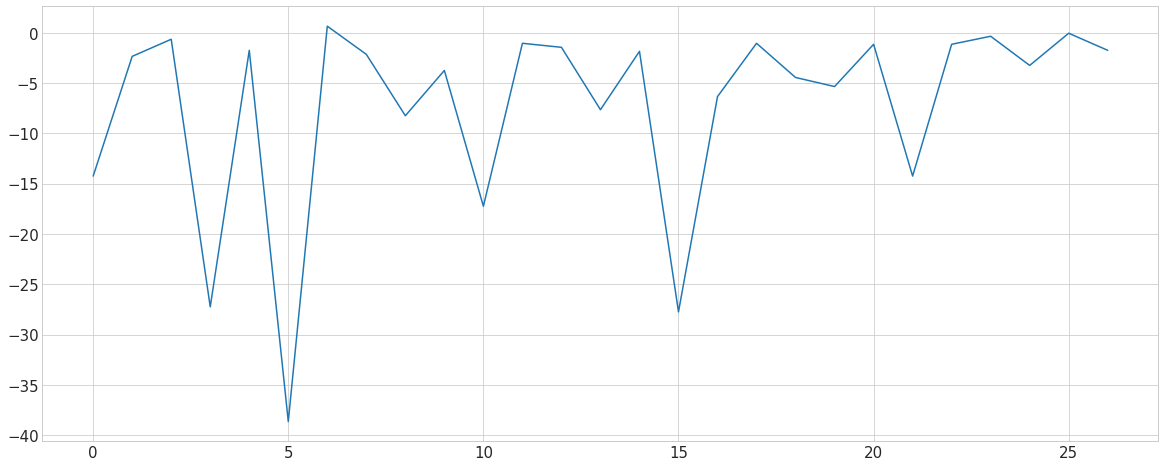

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# for i in range(0, len(plot_list)):
#     if i == 26: continue
#     plt.plot(plot_list[i])
# plt.ylim(-200, 25)

plt.plot(plot_list[0])
# plt.legend(prop={'size': 20})
# plt.xlabel('Iteration', fontsize=15)
# plt.ylabel('Ln P', fontsize=15)

In [4]:
len(plot_list)

179

In [6]:
reward_list = []
episodelength_list = []
collision_list = []
for i in range(NUM_EVAL_EPISODES):
    env.reset()
    current_state = env.current_state_id
    episode_reward = 0
    episode_length = 0
    episode_collision = 0

    while env.terminal==False:
        action =epsilon_greedy(Q[current_state], EPSILON)
        S = env.step(action)
        if env.terminal == True:
            R = 10
        elif env.collided == True:
            R = -0.1
            episode_collision += 1
        else: 
            R = -0.01
        episode_reward += R
        episode_length += 1
        current_state = env.current_state_id
    reward_list.append(episode_reward)
    episodelength_list.append(episode_length)
    collision_list.append(episode_collision)
    print ("episodes: ", i)
        
        

episodes:  0
episodes:  1
episodes:  2
episodes:  3
episodes:  4
episodes:  5
episodes:  6
episodes:  7
episodes:  8
episodes:  9
episodes:  10
episodes:  11
episodes:  12
episodes:  13
episodes:  14
episodes:  15
episodes:  16
episodes:  17
episodes:  18
episodes:  19
episodes:  20
episodes:  21
episodes:  22
episodes:  23
episodes:  24
episodes:  25
episodes:  26
episodes:  27
episodes:  28
episodes:  29
episodes:  30
episodes:  31
episodes:  32
episodes:  33
episodes:  34
episodes:  35
episodes:  36
episodes:  37
episodes:  38
episodes:  39
episodes:  40
episodes:  41
episodes:  42
episodes:  43
episodes:  44
episodes:  45
episodes:  46
episodes:  47
episodes:  48
episodes:  49
episodes:  50
episodes:  51
episodes:  52
episodes:  53
episodes:  54
episodes:  55
episodes:  56
episodes:  57
episodes:  58
episodes:  59
episodes:  60
episodes:  61
episodes:  62
episodes:  63
episodes:  64
episodes:  65
episodes:  66
episodes:  67
episodes:  68
episodes:  69
episodes:  70
episodes:  71
ep

In [7]:
np.mean(episodelength_list)

328.02

In [8]:
np.mean(reward_list)

5.711000000000022

In [9]:
np.mean(collision_list)

11.32